The language of first-order logic.

```xml
<formula> ::= { <comp_fmla1> "imp" } <comp_fmla1> | 
                <comp_fmla1> { ( "iff" | "xor") <comp_fmla1> }
<comp_fmla1> ::= <comp_fmla2> { ("and" | "or") <comp_fmla2> }
<comp_fmla2> ::= { ("not" | <determiner>) } '(' <formula> ')' | 
                 { ("not" | <determiner>) } <atom> | "bot"
<determiner> ::= <quantifier> <var>
<quantifier> ::= "forall" | "exists"
<atom> ::= <prop_letter> | <pred_pre> "(" <term> {',' <term>} ")" |
           <term> <pred_in> <term>
<term> ::= (<term1> | <nterm1>) { <oper_in_1> <term1> }
<nterm1> ::= <oper_pre> { <oper_pre> } <term1>
<term1> ::= <factor> { <oper_in_2> <factor> }
<factor> ::= { <factor_exp> <oper_in_3> } <factor_exp>
<factor_exp> ::= <factor_postfix> { <oper_postfix> }
<factor_postfix> ::= "(" <term> ")"  | <func_call> | <identifier>
<func_call> ::= <func_pre> '(' <term> {',' <term>} ')' 
<identifier> ::= <const> | <numeral> | <var>

# oper_in_1, oper_pre, oper_in_2, oper_in_3, oper_post, 
#   func_pre, const, numeral, var are defined in the Token class.
```

In [1]:
try:
  from first_order_logic_parse import *
except ImportError:
  url = 'https://raw.githubusercontent.com/jhjeong314/Proofmood/main/logical_formulas'
  import httpimport
  with httpimport.remote_repo(url):
    from first_order_logic_parse import *

def testParser(input_text, showOption='polish', verbose=False):
  # showOption ::= 'polish' | 'RPN' | 'infix_text' | 'infix_latex' |
  #                'bussproof' | 'tree'
  # 'bussproof' output is LaTeX source text.
  # verbose has effect only when showOption == 'polish', 'RPN' or 'tree'
  from IPython.display import display, Math

  try:
    ast = parse_text(input_text)
  except ValueError as e:
    print(f"ValueError: {e}")
  except SyntaxError as e:
    print(f"SyntaxError: {e}")
  else:
    if showOption=='polish':
      print(ast.build_polish_notation(verbose))
    elif showOption=='RPN':
      print(ast.build_RPN(verbose))
    elif showOption=='infix_text':
      print(ast.build_infix('text'))
    elif showOption=='infix_latex':
      s = ast.build_infix('latex')
      if verbose:
        print("\n$", s, "$") # latex source text
      display(Math(f"${s}$")) # render LaTeXed expression
    elif showOption=='bussproof':
      s = ast.build_bussproof() 
      print(s)
    elif showOption=='tree':
      ast.draw_tree(verbose)
    else:
      raise ValueError(f"Invalid showOption: {showOption}")

- f_23 - x - - c 12
-f_23(-x, -(-c), 12)


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$-f_{2}(-x, -(-c), 12)$}
\end{prooftree}

root: -f_{2}(-x, -(-c), 12), position: (0.000, 0.000), width: 1.146, height: 0.090



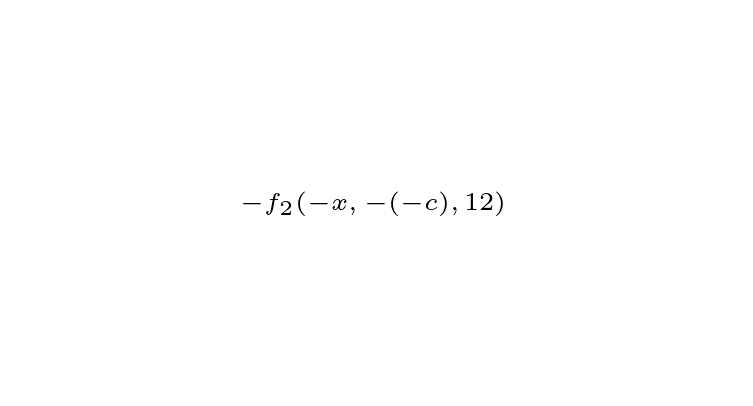

In [2]:
# term example 1

v_str1 = "-f_23(-x, --c, 12)"
testParser(v_str1) 
testParser(v_str1, 'infix_text') 
testParser(v_str1, 'infix_latex') 
testParser(v_str1, 'bussproof') # term has no tree structure
testParser(v_str1, 'tree', verbose=True) # term has no tree structure

In [3]:
# term example 2

v_str1 = "-x + (-(y+x))" 

testParser(v_str1) 
testParser(v_str1, 'infix_text') 
testParser(v_str1, 'infix_latex') 
testParser(v_str1, 'bussproof') # term has no tree structure


+ - x - + y x
-x + (-(y + x))


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$-x + (-(y + x))$}
\end{prooftree}



In [4]:
# term example 3

v_str1 = "x / (y div z)" 

testParser(v_str1) 
testParser(v_str1, 'infix_text') 
testParser(v_str1, 'infix_latex') 

/ x div y z
x / (y div z)


<IPython.core.display.Math object>

In [5]:
# term example 4

v_str1 = "(a+c)^b" 
testParser(v_str1) 
testParser(v_str1, 'infix_text') 
testParser(v_str1, 'infix_latex') 

^ + a c b
(a + c)^{b}


<IPython.core.display.Math object>

In [6]:
# term example 5

v_str1 = "a^inv^#^2" 
testParser(v_str1) 
testParser(v_str1, 'infix_text') 
testParser(v_str1, 'infix_latex') 

^ ^# ^inv a 2
((a^inv)^#)^{2}


<IPython.core.display.Math object>

A3 x a + + y 1 z
A3(x, a, y + 1 + z)


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\AxiomC{$a$}
\AxiomC{$y + 1 + z$}
\TrinaryInfC{$A$}
\end{prooftree}



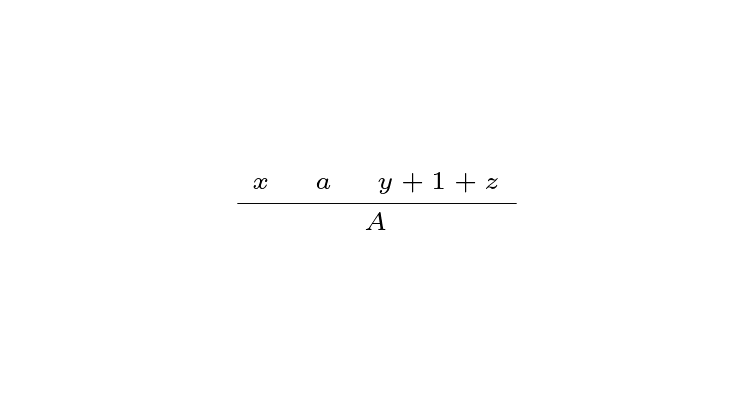

In [7]:
# formula example 1

v_str = 'A3(x,a,y+1+z)'
testParser(v_str)
testParser(v_str, 'infix_text')
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree')

ALongLongPred2 f2 x a y
ALongLongPred2(f2(x, a), y)


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$f(x, a)$}
\AxiomC{$y$}
\BinaryInfC{${\rm ALongLongPred}$}
\end{prooftree}



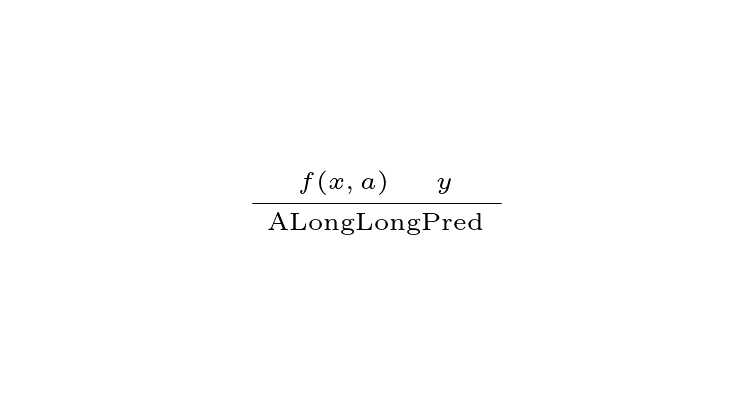

In [8]:
# formula example 2

v_str = 'ALongLongPred2(f2(x,a),  y)'
testParser(v_str)
testParser(v_str, 'infix_text')
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree')

imp BinaryPred2 x y = fLong x y
BinaryPred2(x, y) imp fLong(x) = y


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\AxiomC{$y$}
\BinaryInfC{${\rm BinaryPred}$}
\AxiomC{${\rm fLong}(x)$}
\AxiomC{$y$}
\BinaryInfC{$=$}
\BinaryInfC{$\rightarrow$}
\end{prooftree}

root: \rightarrow, position: (0.000, 0.000), width: 1.626, height: 0.450
root: {\rm BinaryPred}, position: (-0.317, 0.180), width: 0.657, height: 0.270
root: x, position: (-0.133, 0.180), width: 0.075, height: 0.090
root: y, position: (0.136, 0.180), width: 0.068, height: 0.090
root: =, position: (0.595, 0.180), width: 0.771, height: 0.270
root: {\rm fLong}(x), position: (-0.133, 0.180), width: 0.505, height: 0.090
root: y, position: (0.351, 0.180), width: 0.068, height: 0.090



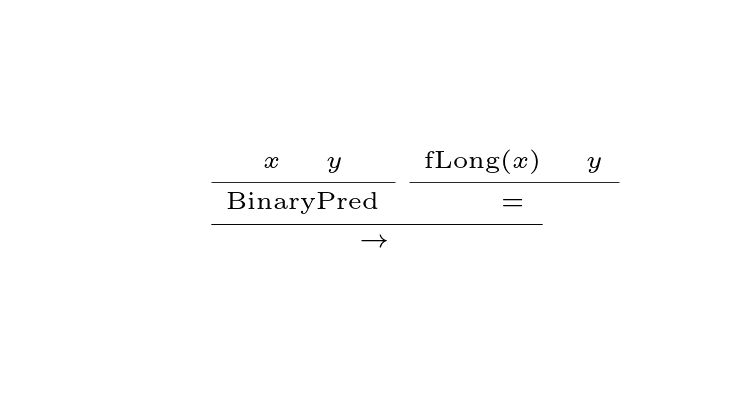

In [9]:
# formula example 3

v_str = 'BinaryPred2( x, y)   imp fLong(x) = y'
testParser(v_str)
testParser(v_str, 'infix_text')
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree', verbose=True)

imp not A_1 and = y y not > ^ x 2 f2 + x 1 y
not A_1 imp y = y and not (x^{2} > f2(x + 1, y))


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$A_{1}$}
\UnaryInfC{$\neg$}
\AxiomC{$y$}
\AxiomC{$y$}
\BinaryInfC{$=$}
\AxiomC{$x^{2}$}
\AxiomC{$f(x + 1, y)$}
\BinaryInfC{$>$}
\UnaryInfC{$\neg$}
\BinaryInfC{$\wedge$}
\BinaryInfC{$\rightarrow$}
\end{prooftree}



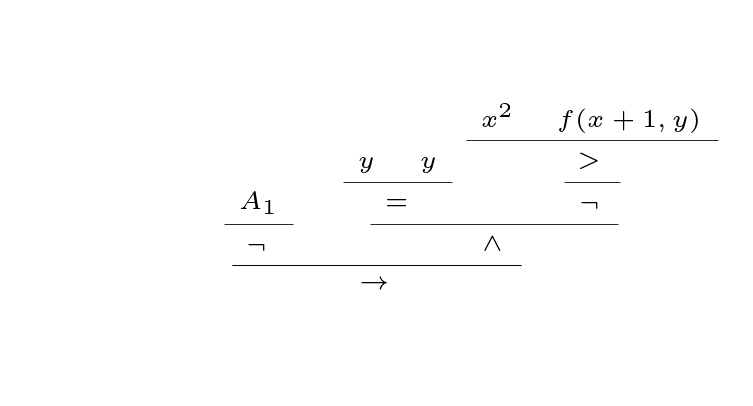

In [10]:
# formula example 4

v_str = "not A_1 imp y = y and not x^2 > f2(x + 1, y)"
testParser(v_str)
testParser(v_str, 'infix_text')
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree')

and < x ^ y 2 <= ^ y 2 + u f 1
x < y^{2} <= u + f(1)


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\AxiomC{$y^{2}$}
\BinaryInfC{$<$}
\AxiomC{$y^{2}$}
\AxiomC{$u + f(1)$}
\BinaryInfC{$\le$}
\BinaryInfC{$\wedge$}
\end{prooftree}



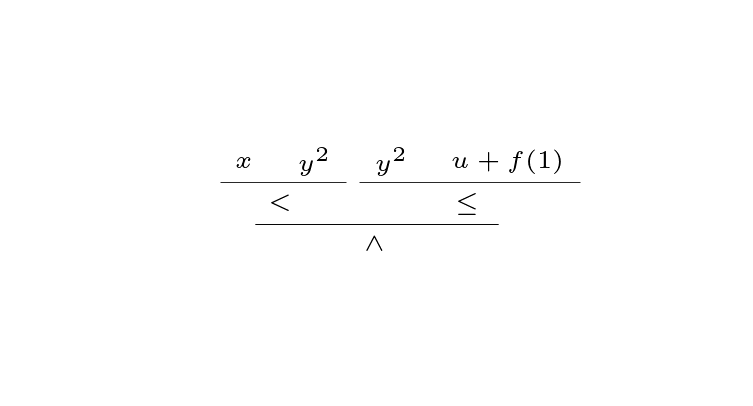

In [11]:
# formula example 5

v_str = "x < y^2 <= u+f(1)"
testParser(v_str)
testParser(v_str, 'infix_text')
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree')

and and < ^ x 2 + ^ y - / 1 2 1 = + ^ y - / 1 2 1 - z sim - z f u
x^{2} < y^{-1 / 2} + 1 = -z sim f(u)


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x^{2}$}
\AxiomC{$y^{-1 / 2} + 1$}
\BinaryInfC{$<$}
\AxiomC{$y^{-1 / 2} + 1$}
\AxiomC{$-z$}
\BinaryInfC{$=$}
\BinaryInfC{$\wedge$}
\AxiomC{$-z$}
\AxiomC{$f(u)$}
\BinaryInfC{$\sim$}
\BinaryInfC{$\wedge$}
\end{prooftree}



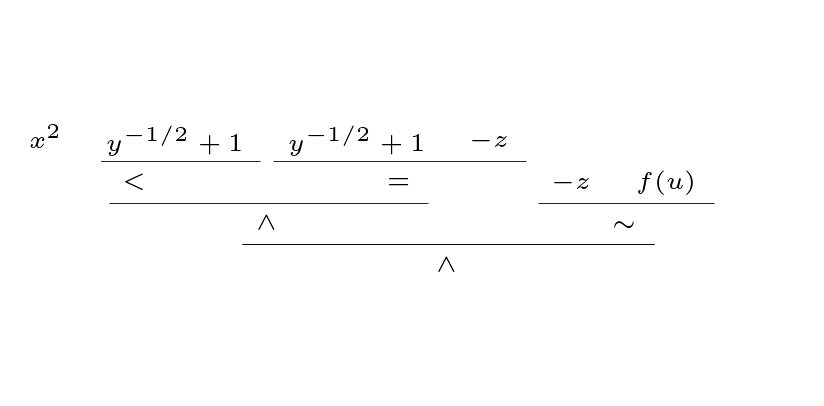

In [12]:
# formula example 6
# The tree in this example is too wide to be displayed correctly.

v_str = "x^2 < y^(-1/2)+1 =  -z  sim f(u)"
testParser(v_str)
testParser(v_str, 'infix_text')
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree')

forall x not Alice_21 x
forall x not Alice_21(x)


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$x$}
\UnaryInfC{${\rm Alice}_{2}$}
\UnaryInfC{$\neg$}
\UnaryInfC{$\forall x$}
\end{prooftree}



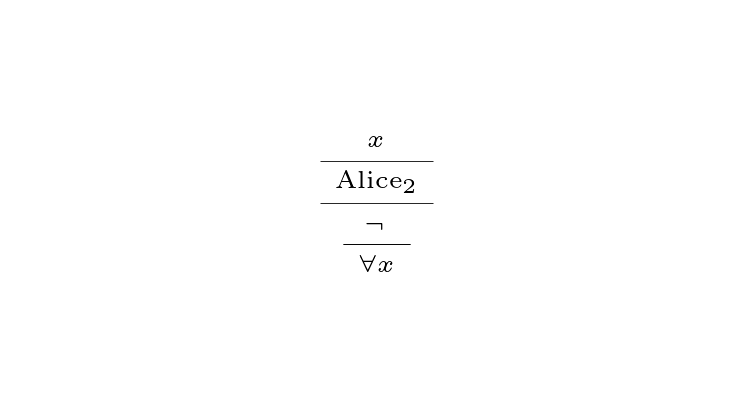

In [13]:
# formula example 7

v_str = "forall x not Alice_21(x)"
testParser(v_str)
testParser(v_str, 'infix_text')
testParser(v_str, 'infix_latex')
testParser(v_str, 'bussproof')
testParser(v_str, 'tree')

iff forall y >= f + x * z_1 ^inv c ^ y 2 exists x B1 y
forall y (f(x + z_1 * c^inv) >= y^{2}) iff exists x B1(y)

$ \forall y\, (f(x + z_{1} * c^{-1}) \ge y^{2})\: \leftrightarrow\: \exists x\, B(y) $


<IPython.core.display.Math object>

\begin{prooftree}
\AxiomC{$f(x + z_{1} * c^{-1})$}
\AxiomC{$y^{2}$}
\BinaryInfC{$\ge$}
\UnaryInfC{$\forall y$}
\AxiomC{$y$}
\UnaryInfC{$B$}
\UnaryInfC{$\exists x$}
\BinaryInfC{$\leftrightarrow$}
\end{prooftree}



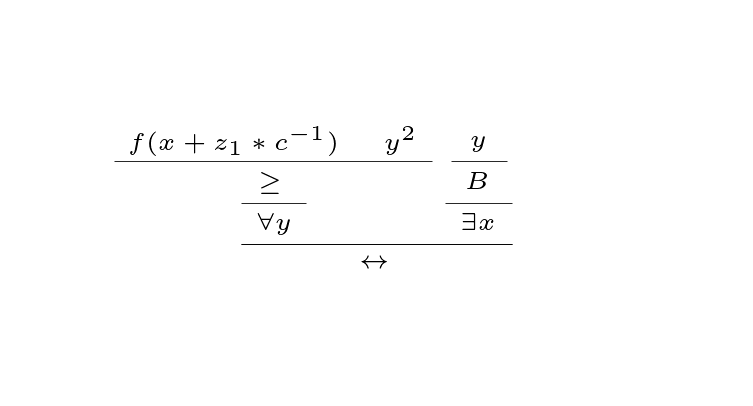

In [14]:
# formula example 8

v_str = "forall y  f(x + z_1 * c^inv) >= y^2 iff exists x B1(y)"
testParser(v_str)
testParser(v_str, 'infix_text')
testParser(v_str, 'infix_latex', verbose=True)
testParser(v_str, 'bussproof')
testParser(v_str, 'tree')

In [15]:
instr_li = ["Cats_and_Dogs_12", "Cats_and_Dogs_", "Cats_and_Dogs23", "Cats2"]
token_li = [Token(instr) for instr in instr_li]
for instr in token_li:
  print(Node.ident2latex(instr))


{\rm Cats\_and\_Dogs}_{1}
{\rm Cats\_and\_Dogs}
{\rm Cats\_and}_{Dogs2}
{\rm Cats}
